In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df1 = pd.read_csv("diabetes.csv")
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df1.columns)
print(df1.shape)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768, 9)


In [4]:
df1 = df1[(df1['Glucose'] != 0) & (df1['Insulin'] != 0)]
df1 = df1[(df1['BloodPressure'] != 0) & (df1['SkinThickness'] != 0) & (df1['BMI'] != 0) & (df1['DiabetesPedigreeFunction'] != 0)]

In [5]:
print(df1.shape)

(392, 9)


In [6]:
df1 = df1.reset_index(drop=True)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [7]:
df2 = df1

Pregnancies


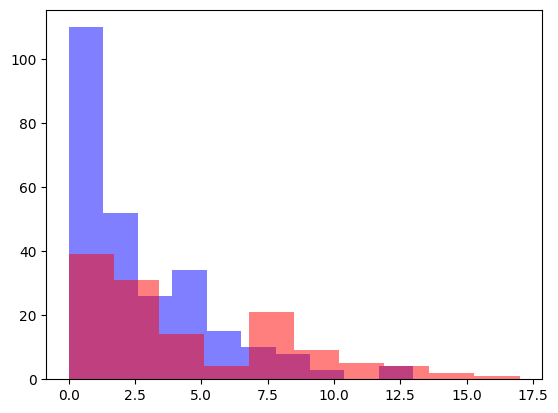

Glucose


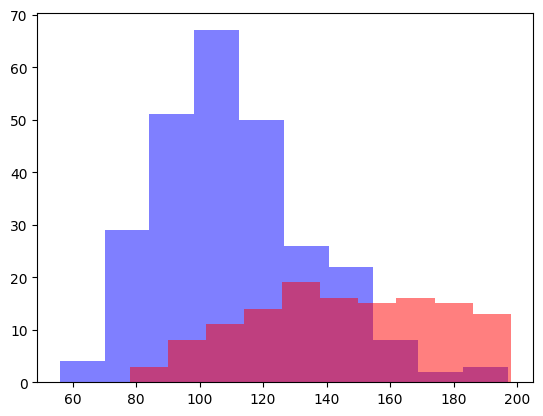

BloodPressure


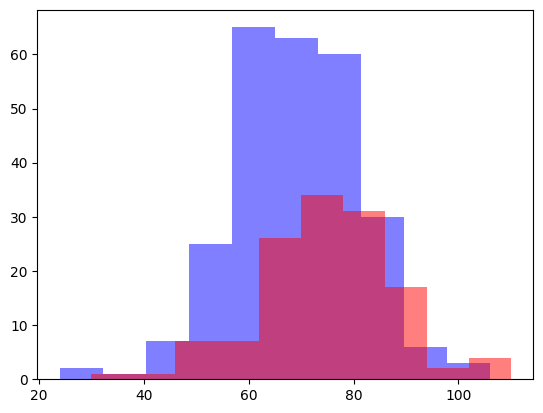

SkinThickness


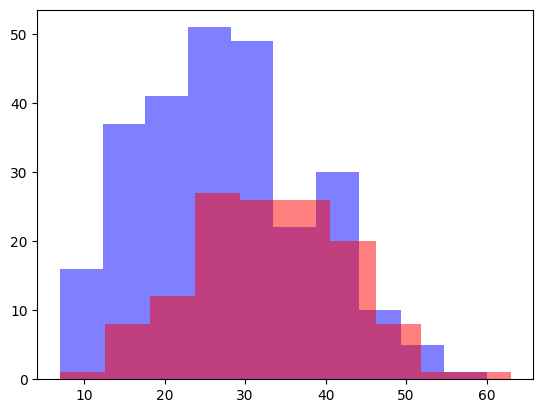

Insulin


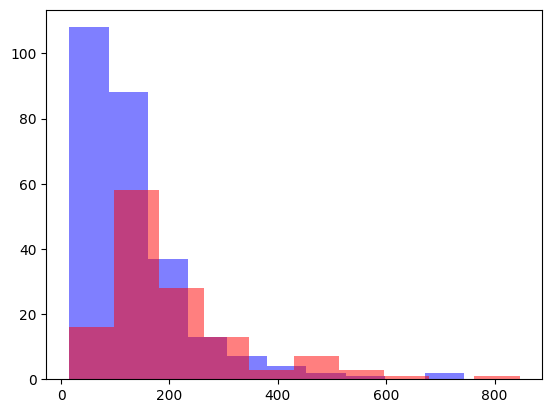

DiabetesPedigreeFunction


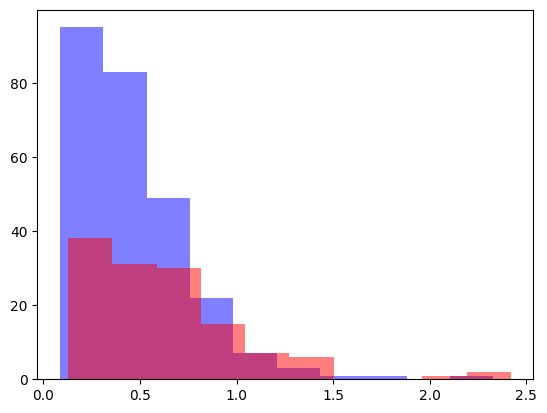

Age


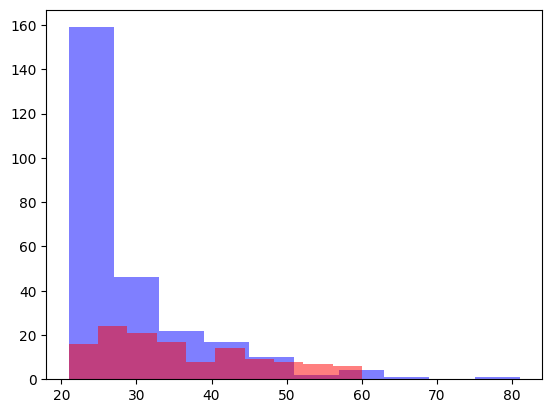

In [8]:
print('Pregnancies')
plt.hist(df1['Pregnancies'][df1['Outcome']==0],alpha=0.5, color = 'b')
plt.hist(df1['Pregnancies'][df1['Outcome']==1], color = 'r',alpha=0.5)
plt.show()

print('Glucose')
plt.hist(df1['Glucose'][df1['Outcome']==0],alpha=0.5, color = 'b')
plt.hist(df1['Glucose'][df1['Outcome']==1], color = 'r',alpha=0.5)
plt.show()

print('BloodPressure')
plt.hist(df1['BloodPressure'][df1['Outcome']==0],alpha=0.5, color = 'b')
plt.hist(df1['BloodPressure'][df1['Outcome']==1], color = 'r',alpha=0.5)
plt.show()

print('SkinThickness')
plt.hist(df1['SkinThickness'][df1['Outcome']==0],alpha=0.5, color = 'b')
plt.hist(df1['SkinThickness'][df1['Outcome']==1], color = 'r',alpha=0.5)
plt.show()

print('Insulin')
plt.hist(df1['Insulin'][df1['Outcome']==0],alpha=0.5, color = 'b')
plt.hist(df1['Insulin'][df1['Outcome']==1], color = 'r',alpha=0.5)
plt.show()

print('DiabetesPedigreeFunction')
plt.hist(df1['DiabetesPedigreeFunction'][df1['Outcome']==0],alpha=0.5, color = 'b')
plt.hist(df1['DiabetesPedigreeFunction'][df1['Outcome']==1], color = 'r',alpha=0.5)
plt.show()

print('Age')
plt.hist(df1['Age'][df1['Outcome']==0],alpha=0.5, color = 'b')
plt.hist(df1['Age'][df1['Outcome']==1], color = 'r',alpha=0.5)
plt.show()

In [9]:
X = df2.drop('Outcome', axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59


In [10]:
y = df2.Outcome
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the MPA algorithm
def update_agents(agents, fitness, best_agent, alpha=0.5, beta=0.1):
    num_agents = agents.shape[0]
    dimension = agents.shape[1]

    for i in range(num_agents):
        # Calculate the distance to the best agent
        distance = best_agent - agents[i]

        # Update position based on MPA rules
        if np.random.rand() < alpha:  # Attraction to the best agent
            agents[i] += alpha * distance * np.random.rand(dimension)
        else:  # Random exploration
            agents[i] += beta * (np.random.rand(dimension) - 0.5)

        # Ensure the new position is within bounds
        agents[i] = np.clip(agents[i], [10, 1, 1, 1, 1], [200, 10, 20, 10, 8])  # Example bounds

    return agents

# Hyperparameter optimization using MPA
def hyperparameter_optimization(X, y, max_iterations=50, num_agents=10):
    # Initialize agents randomly within specified bounds
    # Example: [n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features]
    agents = np.random.rand(num_agents, 5)
    agents[:, 0] = agents[:, 0] * 190 + 10  # n_estimators (10 to 200)
    agents[:, 1] = agents[:, 1] * 9 + 1     # max_depth (1 to 10)
    agents[:, 2] = agents[:, 2] * 20 + 1    # min_samples_split (1 to 20)
    agents[:, 3] = agents[:, 3] * 10 + 1    # min_samples_leaf (1 to 10)
    agents[:, 4] = agents[:, 4] * 8 + 1      # max_features (1 to 8)

    best_fitness = float('-inf')
    best_agent = None

    for iteration in range(max_iterations):
        for i in range(num_agents):
            # Extract hyperparameters
            n_estimators = int(agents[i, 0])
            max_depth = int(agents[i, 1])
            min_samples_split = int(agents[i, 2])
            min_samples_leaf = int(agents[i, 3])
            max_features = int(agents[i, 4])

            # Create and evaluate the RandomForestClassifier
            clf = RandomForestClassifier(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf,
                                         max_features=max_features,
                                         random_state=42)

            # Fit the model and evaluate fitness (accuracy)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness = accuracy_score(y_test, y_pred)

            # Update the best agent if current fitness is better
            if fitness > best_fitness:
                best_fitness = fitness
                best_agent = agents[i]

        # Update agents based on MPA rules
        agents = update_agents(agents, fitness, best_agent)

    return best_agent, best_fitness

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_hyperparams, best_accuracy = hyperparameter_optimization(X_train, y_train)
print("Best Hyperparameters:", best_hyperparams)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: [68.50513151  8.09376657 19.61271243  9.89971687  5.03676159]
Best Accuracy: 0.759493670886076


In [24]:
n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features = best_hyperparams
n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features = round(n_estimators),round(max_depth),round(min_samples_split),round(min_samples_leaf),round(max_features)
print(n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features)

69 8 20 10 5


## RandomForestClassifier using MPA:

In [42]:
model_1 = RandomForestClassifier(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf,
                                         max_features=max_features,
                                         random_state=42)
model_1.fit(X_train.values, y_train.values)
model_1_train = model_1.predict(X_train.values)
print("Training Accuracy =", format(metrics.accuracy_score(y_train.values, model_1_train)))
pred_1 = model_1.predict(X_test.values)
print("Test Accuracy =", format(metrics.accuracy_score(y_test.values, pred_1)))
Accuracy = format(metrics.accuracy_score(y_test.values, pred_1))
print('acc=',Accuracy)
number_float = float(Accuracy)
number_float = number_float * 100
Accuracy = round(number_float, 1)
print(confusion_matrix(y_test.values, pred_1))
print(classification_report(y_test.values, pred_1))

Training Accuracy = 0.8594249201277955
Test Accuracy = 0.759493670886076
acc= 0.759493670886076
[[45  7]
 [12 15]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        52
           1       0.68      0.56      0.61        27

    accuracy                           0.76        79
   macro avg       0.74      0.71      0.72        79
weighted avg       0.75      0.76      0.75        79



## Normal RandomForestClassifier

In [15]:
model_2 = RandomForestClassifier(n_estimators=n_estimators,random_state=42)
model_2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=152, random_state=42)

In [16]:
model_2_train = model_2.predict(X_train)
print("Training Accuracy =", format(metrics.accuracy_score(y_train, model_2_train)))
pred_2 = model_2.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, pred_2)))
print(confusion_matrix(y_test, pred_2))
print(classification_report(y_test, pred_2))

Training Accuracy = 1.0
Test Accuracy = 0.7848101265822784
[[45  7]
 [10 17]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        52
           1       0.71      0.63      0.67        27

    accuracy                           0.78        79
   macro avg       0.76      0.75      0.75        79
weighted avg       0.78      0.78      0.78        79



In [46]:
print(model_1.predict([[0, 137, 40, 35, 168, 43.1, 2.228, 33]]))
print(model_1.predict([[10, 101, 76, 48, 180, 32.9, 0.171, 63]]))
print(model_1.predict([[0, 80, 66, 28, 100, 24.0, 0.159, 24]]))
a = model_1.predict([[0, 80, 66, 28, 100, 24.0, 0.159, 24]])
type(a)
print(a)
b = a[0]
print(b)

[1]
[1]
[0]
[0]
0


In [45]:
type(a)

numpy.ndarray

In [43]:
print(float(Accuracy))
type(Accuracy)

75.9


float

In [47]:
pre = 0
glu = 80
bp = 66
st = 28
ins = 100
bmi = 24.0
dpf = 0.159
age = 24

In [49]:
a=model_1.predict([[pre,glu,bp,st,ins,bmi,dpf,age]])
b=a[0]
print(b)

0
